In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#
# for date time you can use datetime python library
from datetime import datetime

In [6]:
my_year = 2017
my_month = 1
my_day = 23
my_hour= 16
my_minute = 30
my_second = 15


In [11]:
my_date = datetime(my_year,my_month,my_day)
my_date2 = datetime(my_year,my_month,my_day,my_hour,my_second)

In [9]:
# here we have a datetime object
my_date

datetime.datetime(2017, 1, 23, 0, 0)

In [12]:
my_date2

datetime.datetime(2017, 1, 23, 16, 15)

In [16]:
#
# This object has attributes ad methods
print(str(my_date.day) + " day of month: "  + str(my_date.month))


23 day of month: 1


In [18]:
# this is a lisf of datetime objects and then we convert it to a time index
first_two = [ datetime(2016,1,1), datetime(2016,1,2)]
#
dt_index = pd.DatetimeIndex(first_two)
print(type(dt_index))
dt_index


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [19]:
#
# now we crate a df with random data and apply the index
data = np.random.rand(2,2)
cols = ['a','b']
df = pd.DataFrame(data,dt_index,cols)
df

,a,b
2016-01-01,0.152032,0.222086
2016-01-02,0.638532,0.248654


In [21]:
# now we can play around with the indexes and get
#
# 1. the index value for the latest/earliest date
print(df.index.argmin())
print(df.index.argmax())
#
# 2. the the value of the latest/min date
print(type(df.index.max()))
print(df.index.max())
print(df.index.min())

0
1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-01-02 00:00:00
2016-01-01 00:00:00


In [50]:
df = pd.read_csv('data/ch7/walmart_stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [51]:
#
# we want the date column to be an index but we can see that pandas consider them a generic object (i.e a string)
# so we need to covert it
print(df.info())
#
# CONVERT STRING TO DATE
print("------------  COVERT Date to Datetime")
print("------------")
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())
print("------------  Note")
print("the Pandas function accepts a format parameter in case the string original value is custom")
print("the help on the function can show you examples on the format expected and how it should be written")
print("------------")
print("------------  Now we set the colum as the index")
# 
# Method 1. this duplicates the date column: original one + index
#df.index =df['Date']
# 
# Method 2. this replaces the index with the Date column (i.e no duplication)
#           inplace=True means change the original df
#           Also note that the column does not exist anymore, it is now an index
df.set_index('Date', inplace=True)
print(df.head())
print("-------------------")
print("-------------------")
print("the column does not exist anymore..Date has becom and index")
print("columns are now:  " + str(df.columns))
print("-------------------")
print("-------------------")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None
------------  COVERT Date to Datetime
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-nu

In [56]:
#
# Method 2. this loads the df using a specific column as index to begin with
#           Note you still have to covert it to datetime
df2 = pd.read_csv('data/ch7/walmart_stock.csv', index_col='Date')
print(type(df2.index))
#
# you can load and parse it at the same time (if the format is known)
df2 = pd.read_csv('data/ch7/walmart_stock.csv', index_col='Date', parse_dates=True)
print(type(df2.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [57]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [64]:
############################################################
##
##               TIME RES-SAMPLING
##
############################################################
# resample use rules that are pre-encoded
# and you can specify the rule by codes
#
# Re-smaple works as a groupby methods specifically written for time data:
# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds 
#
# see also: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#
# all resamples ules need a grouping/aggregate methods so for instance here we:
# - aggregate using a mean of values
# - with periods that are open/closed following rule A: (last day of the year)
print("End of year resample:")
print(df.resample(rule='A').mean().head(n=3))
print("------------------")
print("------------------\n")
#
# - aggregate using a mean of values
# - with periods that are open/closed following rule Q: (quarterly)
print("\nQuarterly resample:")
print(df.resample(rule='Q').mean().head(n=3))
print("------------------")
print("------------------\n")
#
# - aggregate using a mean of values
# - with periods that are open/closed following rule BQ: (business quarterly)
print("\nBusiness Quarterly resample:")
print(df.resample(rule='BQ').mean().head(n=3))
print("------------------")
print("------------------\n")
#
# - aggregate using your own custom function (e.g. in this case we give out the value of the first day of the period)
# - with periods that are open/closed following rule A: (last day of the year)
print("\nCustom Yearly resample:")
def first_day(entry):
    return entry[0]
print(df.resample('A').apply(first_day).head(n=3))


End of year resample:
                 Open       High        Low      Close        Volume  \
Date                                                                   
2012-12-31  67.158680  67.602120  66.786520  67.215120  9.239015e+06   
2013-12-31  75.264048  75.729405  74.843055  75.320516  6.951496e+06   
2014-12-31  77.274524  77.740040  76.864405  77.327381  6.515612e+06   

            Adj Close  
Date                   
2012-12-31  59.389349  
2013-12-31  68.147179  
2014-12-31  71.709712  
------------------
------------------


Quarterly resample:
                 Open       High        Low      Close        Volume  \
Date                                                                   
2012-03-31  60.462903  60.807258  60.160484  60.519516  8.850221e+06   
2012-06-30  62.888889  63.400159  62.592222  63.057143  1.155795e+07   
2012-09-30  73.081587  73.549682  72.717619  73.174921  7.871587e+06   

            Adj Close  
Date                   
2012-03-31  52.881839  
2012

Plotting mean of yearly closing Figures


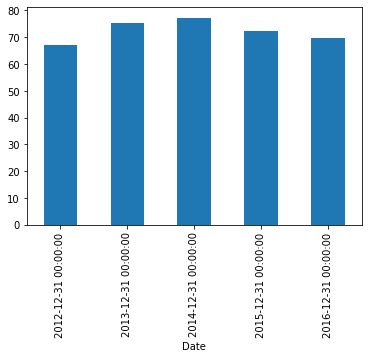



-----------------
Plotting mean of monthly closing Figures


<Axes: xlabel='Date'>

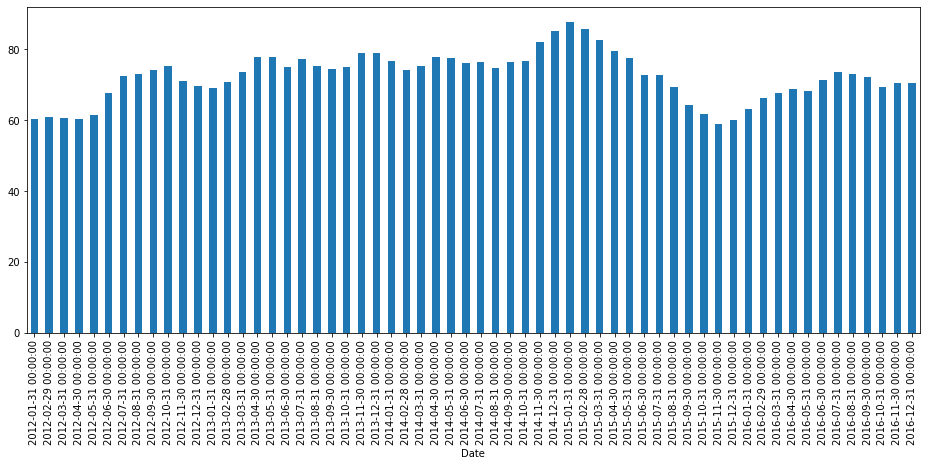

In [68]:
#
# now we can use this resample to get the info we want and graph it
# E.G.
print("Plotting mean of yearly closing Figures")
df['Close'].resample(rule='A').mean().plot(kind='bar')
plt.show()
print("\n\n-----------------")
print("Plotting mean of monthly closing Figures")
df['Close'].resample(rule='M').mean().plot(kind='bar', figsize=(16,6))


In [104]:
############################################################
##
##               TIME SHIFTING
##
############################################################
# 
df = pd.read_csv('data/ch7/walmart_stock.csv', index_col='Date', parse_dates=True)
print("First 3 entries in the df")
print(df.loc[df.index[0:3]])
print("\nShape is:" + str(df.shape))
print("\nLast entry: " + str(df.loc[df.index[-3:]]))
print("--------------------------")
print("--------------------------\n\n")
print("Now we shift one and print again")
df2 = df.shift(periods=1)
print("First 3 entries in the df")
print(df2.loc[df.index[0:3]])
print("\nShape is:" + str(df2.shape))
print("\nLast entry: " + str(df2.loc[df2.index[-2:]]))
print("\nwe shifted the df one so if an entry was index 1 now its index is 2")
print("- A new first entry has been created with Nan values..")
print("- The number of rowas stays the same so we lose the last entry but the indexes don't change")


First 3 entries in the df
                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539

Shape is:(1258, 6)

Last entry:                  Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2016-12-28  69.940002  70.000000  69.260002  69.309998  4875700  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002  4298400  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003  6889500  68.615479
--------------------------
--------------------------


Now we shift one and print again
First 3 entries in the df
                 Open       High        Low      Close      Volume  Adj

In [106]:
print("Now we shift one day backward and print again")
df2 = df.shift(periods=-1)
print("First 3 entries in the df")
print(df2.loc[df.index[0:3]])
print("\nShape is:" + str(df2.shape))
print("\nLast entry: " + str(df2.loc[df2.index[-2:]]))
print("\nwe shifted the df one day backward so")
print(" - the entry that was at index zero is lost")
print(" - the entry that was at day X is now at day x-1")
print(" - the last entry shows all Nan")
print(" - The number of rows stays the same")

Now we shift one day backward and print again
First 3 entries in the df
                 Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-04  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-05  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220

Shape is:(1258, 6)

Last entry:                  Open   High        Low      Close     Volume  Adj Close
Date                                                                    
2016-12-29  69.120003  69.43  68.830002  69.120003  6889500.0  68.615479
2016-12-30        NaN    NaN        NaN        NaN        NaN        NaN

we shifted the df one day backward so
 - the entry that was at index zero is lost
 - the entry that was at day X is now at day x-1
 - the last entry shows all Nan
 - The number of rows stays the same


In [112]:
#
#  INDEX TIME SHIFTING
#
# so before we shifted the values but the index stayed the same
# here instead we are going to "shift" convert the index itself while the data stays the same
# for instance:
# - index is day date
# - we want the index to be the same date (last day of the month) for entries in the same month
#   e.g. 01/01/24, 02/01/24, ...30/01/24 entries will all be transformed to 31/01/24
#
# NOTE: THE COURSE IS USING TSHIFT BUT NOW THIS IS UNDER SHIFT
#
print(df.head(n=3) )
print("\n-------")
print("Date time converted as last day of the month")
print(df.shift(freq='M').head(n=3) )
print("\n-------")
print("Date time converted as last day of the year")
print(df.shift(freq='A').head(n=3) )

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539

-------
Date time converted as last day of the month
                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-31  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-31  59.349998  59.619999  58.369999  59.419998  12768200  51.825539

-------
Date time converted as last day of the year
                 Open       High        Low      Close    Volume  Adj Close
Date                                                     

In [102]:
df2.iloc[-1:-1]


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-29,69.120003,69.43,68.830002,69.120003,6889500.0,68.615479


<Axes: xlabel='Date'>

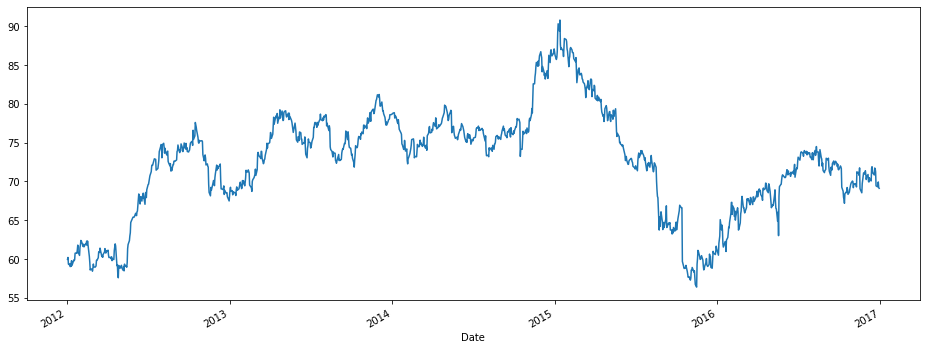

In [113]:
############################################################
##
##               ROLLING AND EXPANDING
##
############################################################
#
#
# Data can be noisy
# so we can try to replace daily data with weekly data averages
# we need to compute the average on a weekly period and roll it over on the whole time series
df['Open'].plot(figsize=(16,6))